In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, _),(X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

In [5]:
autoencoder = Sequential()

#encoder
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28, 28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

#decoder
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

In [7]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 285s 594ms/step - loss: 0.2200 - val_loss: 0.1400
Epoch 2/50
469/469 [==============================] - 333s 710ms/step - loss: 0.1293 - val_loss: 0.1202
Epoch 3/50
469/469 [==============================] - 427s 912ms/step - loss: 0.1173 - val_loss: 0.1126
Epoch 4/50
469/469 [==============================] - 342s 729ms/step - loss: 0.1112 - val_loss: 0.1077
Epoch 5/50
469/469 [==============================] - 256s 547ms/step - loss: 0.1074 - val_loss: 0.1047
Epoch 6/50
469/469 [==============================] - 275s 587ms/step - loss: 0.1048 - val_loss: 0.1023
Epoch 7/50
469/469 [==============================] - 365s 777ms/step - loss: 0.1026 - val_loss: 0.1006
Epoch 8/50
469/469 [==============================] - 367s 783ms/step - loss: 0.1008 - val_loss: 0.0987
Epoch 9/50
469/469 [==============================] - 301s 642ms/step - loss: 0.0992 - val_loss: 0.0971
Epoch 10/50
469/469 [==============================] - 265s 566m

313/313 [==============================] - 14s 46ms/step


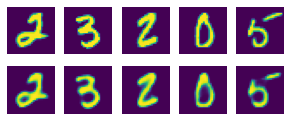

In [10]:
random_test = np.random.randint(X_test.shape[0], size=5)

ae_imgs = autoencoder.predict(X_test)

plt.figure(figsize=(7,2))

for i, image_idx in enumerate(random_test):
    ax = plt.subplot(2, 7, i+1)
    plt.imshow(X_test[image_idx].reshape(28,28))
    ax.axis('off')
    ax = plt.subplot(2, 7, 7+i+1)
    plt.imshow(ae_imgs[image_idx].reshape(28,28))
    ax.axis('off')
plt.show()